<center>
    <h2>CHƯƠNG 3 - HỌC CÓ GIÁM SÁT - PHẦN 2: </h2> 
    <h2> THUẬT TOÁN CÂY QUYẾT ĐỊNH (DECISION TREE) </h2>
</center>


---
**NỘI DUNG BÀI HỌC:**
1. Thuật toán Cây quyết định (Decision Tree)
2. Ứng dụng Decision Tree cho bài toán phân lớp hoa lan
3. Tham số đánh giá hệ thống phân lớp (Accuracy, Confusion Matrix)
4. Bài tập Thực hành

---
Copyright @dangvannam - FIT.HUMG.2023

# 1. THUẬT TOÁN CÂY QUYẾT ĐỊNH (DECISION TREE)
---
* Việc quan sát, suy nghĩ và ra các quyết định của con người thường được bắt đầu từ các câu hỏi. Machine learning cũng có một mô hình ra quyết định dựa trên các câu hỏi. Mô hình này có tên là cây quyết định (decision tree).

* Decision tree là một mô hình học có giám sát, có thể được áp dụng vào cả hai bài toán classification và regression. 

<img src='pic/decisiontree.png' width='400px'>

* Dùng cấu trúc cây để đưa ra một hàm phân lớp cần học (hàm mục tiêu có giá trị rời rạc)
* Một cây quyết định có thể được biểu diễn (diễn giải) bằng một tập các luật IF-THEN (dễ đọc và dễ hiểu)
* Được áp dụng thành công trong rất nhiều các bài toán ứng dụng thực tế

**Các độ đo lựa chọn thuộc tính:**
* Một độ đo lựa chọn thuộc tính là một phương pháp tiên nghiệm (heuristic) để lựa chọn tiêu chí phân chia để phân tách tốt nhất phần dữ liệu D đã cho
* Một cách lý tưởng
    - Mỗi phần được chia ra nên thuần nhất
    - Mỗi phần thuần nhất là phần chứa các mẫu cùng thuộc một lớp
* Các độ đo phân chia thuộc tính (các luật phân chia)
    - Xác định các mẫu ở một node được phân chia thế nào
    - Đưa ra cách xếp hạng các thuộc tính
    - Thuộc tính với điểm cao nhất được lựa chọn
    - Xác định một điểm phân chia hoặc một tập con phân chia
* Các phương pháp
    - Information gain
    - Gain ratio
    - Gini Index
    
**NHẬN XÉT CÂY QUYẾT ĐỊNH:**
* Cây quyết định có tốc độ học tương đối nhanh so với các phương pháp khác
* Đơn giản và dễ hiểu các luật phân loại trong cây ra quyết định
* Information Gain, Gain Ratio, và Gini Index là những phương pháp lựa chọn thuộc tính thông dụng nhất
* Cắt tỉa cây là cần thiết để loại bỏ những nhánh không tin cậy

### Một số vấn đê về xây dựng cây
---
Gốc của cây chứa tất cả dữ liệu, các node trung gian, các node lá.
- Các node được chia nhị phân: 
    - Chọn một thuộc tính $X_i$
    - Chọn một điểm chia $t_j$

- Độ sâu của cây?
- Số mẫu trong mỗi node lá?
- Số node lá lớn nhất?

**Root node (Nút gốc)**: Chứa toàn bộ dữ liệu mẫu. Dữ liệu này được chia thành các nhóm nhỏ hơn

**Splitting (Phân nhóm)**: Là quá trình chia các nhóm thành các nhóm nhỏ hơn

**Decision node (Nút quyết định)**: Là các nút tiếp tục được phân chia

**Leaf node (Nút lá)**: Là các nút không được phân chia

**Prunning (Tỉa cành)**: Loại bỏ một số nút phụ của cây

**Sub-Tree (nhánh)**: Là một bộ phận của cây

**Parent and Child node (Nút cha và nút con)**: Nút bị chia thành các nút phụ gọi là nút cha, các nút phụ của nút cha gọi là nút con

### Ưu và nhược điểm của cây quyết định

- **Ưu điểm:**
    - Dễ hiểu: Cây biểu diễn trực quan
    - Hữu ích: Xác định được các biến quan trọng
    - Phi tham số: không cần giả định về phân phối
    - Không phục thuộc vào dữ liệu: Có thể áp dụng cả dữ liệu phân loại và liên tục
- **Nhược điểm:**
    - Dễ bị quá khớp (overfitting)

## Phân loại dựa trên cây quyết định
- Cho dữ liệu $(x_i,y_i)$ với $y_i\in \{1,2,\dots,K\}$ chia thành $K$ nhóm.
- Với mỗi nút $m$ biểu diễn bởi miền $R_m$ với $N_m$ quan sát. Ta tính $p_{mk}$ là tỷ lệ các quan sát thuộc nhóm $k$ tại nút $m$: $$p_{mk}=\dfrac{1}{N_m}\sum\limits_{x_i\in R_m}I_{[y_i=k]} $$
- Nút $m$ phân loại thành nhóm có tỷ lệ cao nhất $$k(m)=\arg\max_k \{p_{mk}\}$$

**Độ đo đồng nhất cho mỗi nút**
- Với mỗi nút $m$ ta đo độ đồng nhất của mỗi nút
    - Xác suất phân loại sai (missclassification error): $$Q_m=\dfrac{1}{N_m}\sum\limits_{x_i\in R_m}I_{[y_i\ne k]}=1-p_{kk(m)}  $$
    - Chỉ số Gini: $$Q_m=\sum\limits_{k\ne l} p_{mk}p_{ml}=\sum\limits_{k=1}^K p_{mk}(1-p_{mk})=1-\sum\limits_{k=1}^K p^2_{mk} $$
    - Entropy chéo (cross-entropy): $$ Q_m=-\sum\limits_{k=1}^K p_{mk}\log p_{mk}$$

**Thuật toán:**
- Với mỗi nút ( không phải nút lá):
    - Với mỗi biến $X_k$:
        - Tìm điểm cắt tối ưu $s$ $$s=\arg\min_s \big[Q(X_k,s)=Q(x_{ik}\le s)+Q(x_{ik}> s)\big], $$  
    - Chọn biến $X_k$ và $s$ với $Q(X_k,s)$ bé nhất
- Lặp đến khi đạt đến điều kiện dừng


## 2. XÂY DỰNG MÔ HÌNH HỌC MÁY PHÂN LỚP HOA LAN VỚI THUẬT TOÁN DECISION TREE
---
Tập dữ liệu bao gồm 150 mẫu về thông số chiều rộng, chiều dài của lá hóa và cánh hoa của 3 loại hoa Lan được gán nhãn:
* 0 - Setosa (50 mẫu)
* 1 - Vericolor (50 mẫu)
* 2 - Virginica (50 mẫu)

<img src='pic/iris.png' width='400px'>

In [1]:
#Gọi các thư viện sử dụng:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#-----------------------------------------
import warnings
warnings.filterwarnings('ignore')

### 2.1. Đọc dữ liệu
---

In [2]:
#Đọc tập dữ liệu Iris Dataset
df_iris = pd.read_csv('Data/Data_Iris.csv')
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
#Hiện thị ngẫu nhiên 5 mẫu:
df_iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
107,7.3,2.9,6.3,1.8,Iris-virginica
16,5.4,3.9,1.3,0.4,Iris-setosa
64,5.6,2.9,3.6,1.3,Iris-versicolor
26,5.0,3.4,1.6,0.4,Iris-setosa
65,6.7,3.1,4.4,1.4,Iris-versicolor


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64


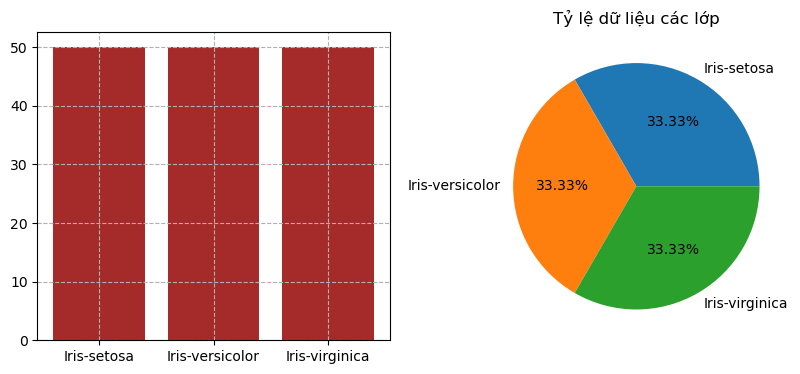

In [4]:
#Kiểm tra cân bằng dữ liệu
check = df_iris['species'].value_counts()
print(check)

# Trực quan hóa dữ liệu
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.bar(check.index,
        check.values,
        color='brown')
plt.grid(ls='--')

plt.subplot(1,2,2)
plt.pie(check.values, 
        labels=check.index,
       autopct='%.2f%%')
plt.title('Tỷ lệ dữ liệu các lớp')
plt.show() # --> Tập dữ liệu cân bằng

**Nhận xét**
- tập dữ liệu cân bằng

### 2.2 Phân tách biến đầu vào (X) - Nhãn y
---
- Biến đầu vào - Biến độc lập (X): 04 - sepal_length,sepal_width,petal_length, petal_width
- Biến đầu ra - Nhãn (y): 01 - species

In [5]:
#Dữ liệu ban đầu:
df_iris.iloc[[0,50,120],:]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
120,6.9,3.2,5.7,2.3,Iris-virginica


In [6]:
#Thực hiện chuyển đổi nhãn y --> số:
df_iris['species'] = df_iris['species'].map({
    'Iris-setosa':0,
    'Iris-versicolor':1,
    'Iris-virginica':2
    
}).astype(int)
df_iris.iloc[[0,50,120],:]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
50,7.0,3.2,4.7,1.4,1
120,6.9,3.2,5.7,2.3,2


In [7]:
#Tách biến độc lập - biến phụ thuộc
X = df_iris.iloc[:,0:4].values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
# lấy biến phụ thuộc y
y = df_iris.iloc[:,-1].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 2.3. Tách tập dữ liệu ra tập Training - Test: 
---
* Training: dùng để huấn luyện mô hình (70%)
* Test: dùng để kiểm thử mô hình (30%)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                   y,
                                                   test_size=0.3,
                                                   shuffle=True) # lấy ngẫu nhiên
print('Số mẫu trong dữ liệu gốc ban đầu :', len(y))
print('Số mẫu troing dữ liệu train (70%): ', len(y_train))
print('Số mấu treong dữ liệu test (30%): ',len(y_test))


Số mẫu trong dữ liệu gốc ban đầu : 150
Số mẫu troing dữ liệu train (70%):  105
Số mấu treong dữ liệu test (30%):  45


In [10]:
#Phân tách Train - Test:
y_train

array([0, 1, 0, 1, 1, 1, 1, 2, 0, 0, 2, 2, 0, 2, 0, 1, 0, 2, 1, 1, 1, 1,
       1, 2, 2, 0, 2, 2, 0, 1, 2, 0, 0, 1, 2, 1, 0, 1, 0, 2, 2, 0, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 1, 1,
       2, 1, 2, 0, 0, 2, 2, 0, 2, 1, 1, 2, 0, 0, 0, 1, 0, 1, 0, 2, 2, 1,
       1, 0, 2, 0, 2, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0])

In [11]:
#Các loại hoa lan trong tập Train:


In [12]:
#Các loại hoa lan trong tập Test:


### 2.3. Sử dụng thuật toán Decision Tree để phân lớp
---

In [13]:
#Gọi thư viên thuật toán DecisionTree
from sklearn.tree import DecisionTreeClassifier
# Khgai báo mô hình : sử dụng các tham số mặc định của mô hình
Tree_iris = DecisionTreeClassifier() 

#Danh sách các tham số của mô hình
Tree_iris.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

### Một số tham số quan trọng của thuật toán Decision Tree trong thư viện sklearn:
Tham khảo DecisionTree của thư viện sklearn:
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=sklearn%20tree%20decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier


1. criterion: Xác định phương pháp đo để lựa chọn thuộc tính quan trọng của cây- {"gini", "entropy" } (default = gini)
2. splitter: phương pháp lựa chọn tách mỗi node - {“best”, “random”}, default=”best”
3. max_depth: Chiều sâu tối đa của cây - int, default=None (các node được mở rộng đến khi phân được hết các lá)
4. min_samples_split:(int or float, default=2) Số lượng mẫu tối thiểu cần thiết để phân tách một nút trong.
    * If int, then consider min_samples_split as the minimum number.
    * If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.
5. min_samples_leaf: (int or float, default=1): Số lượng mẫu tối thiểu cần thiết để có ở một node lá. Một điểm tách ở độ sâu bất kỳ sẽ chỉ được xem xét nếu để lại ít nhất số lượng mẫu tối thiểu bằng giá trị min_samples_leaf trong mỗi nhánh bên trái hoặc bên phải.
6. max_features: (int, float or {“auto”, “sqrt”, “log2”}, default=None): Số lượng các biến độc lập (features) xem xét khi tìm kiếm thuộc tính tốt nhất để tách. None: Xem xét tất cả các đặc trưng X
7. max_leaf_nodes: (int, default=None): Xác định số node lá tối đa của cây.

In [14]:
# Huấn luyện mô hình với dữ liệu huấn luyện:
Tree_iris.fit(X_train, y_train)


DecisionTreeClassifier()

In [15]:
#Đánh giá độ chính xác trên tập Huấn luyện:
acc_train = Tree_iris.score(X_train, y_train)
print('Độ chính xác của mô hình huấn luyện: ', round(acc_train*100,2))


Độ chính xác của mô hình huấn luyện:  100.0


### Hiển thị cây quyết định:
---
Trực quan hóa cây quyết định thu được từ model đã huấn luyện trên tập Train

In [16]:
#Đặt tên cho các thuộc tính và các lớp hoa iris:
feature_names = ['sepal length (cm)',
                 'sepal width (cm)',
                 'petal length (cm)',
                 'petal width (cm)']

target_names = ['0: Setosa', '1: Versicolor', '2:Virginica']

In [45]:
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


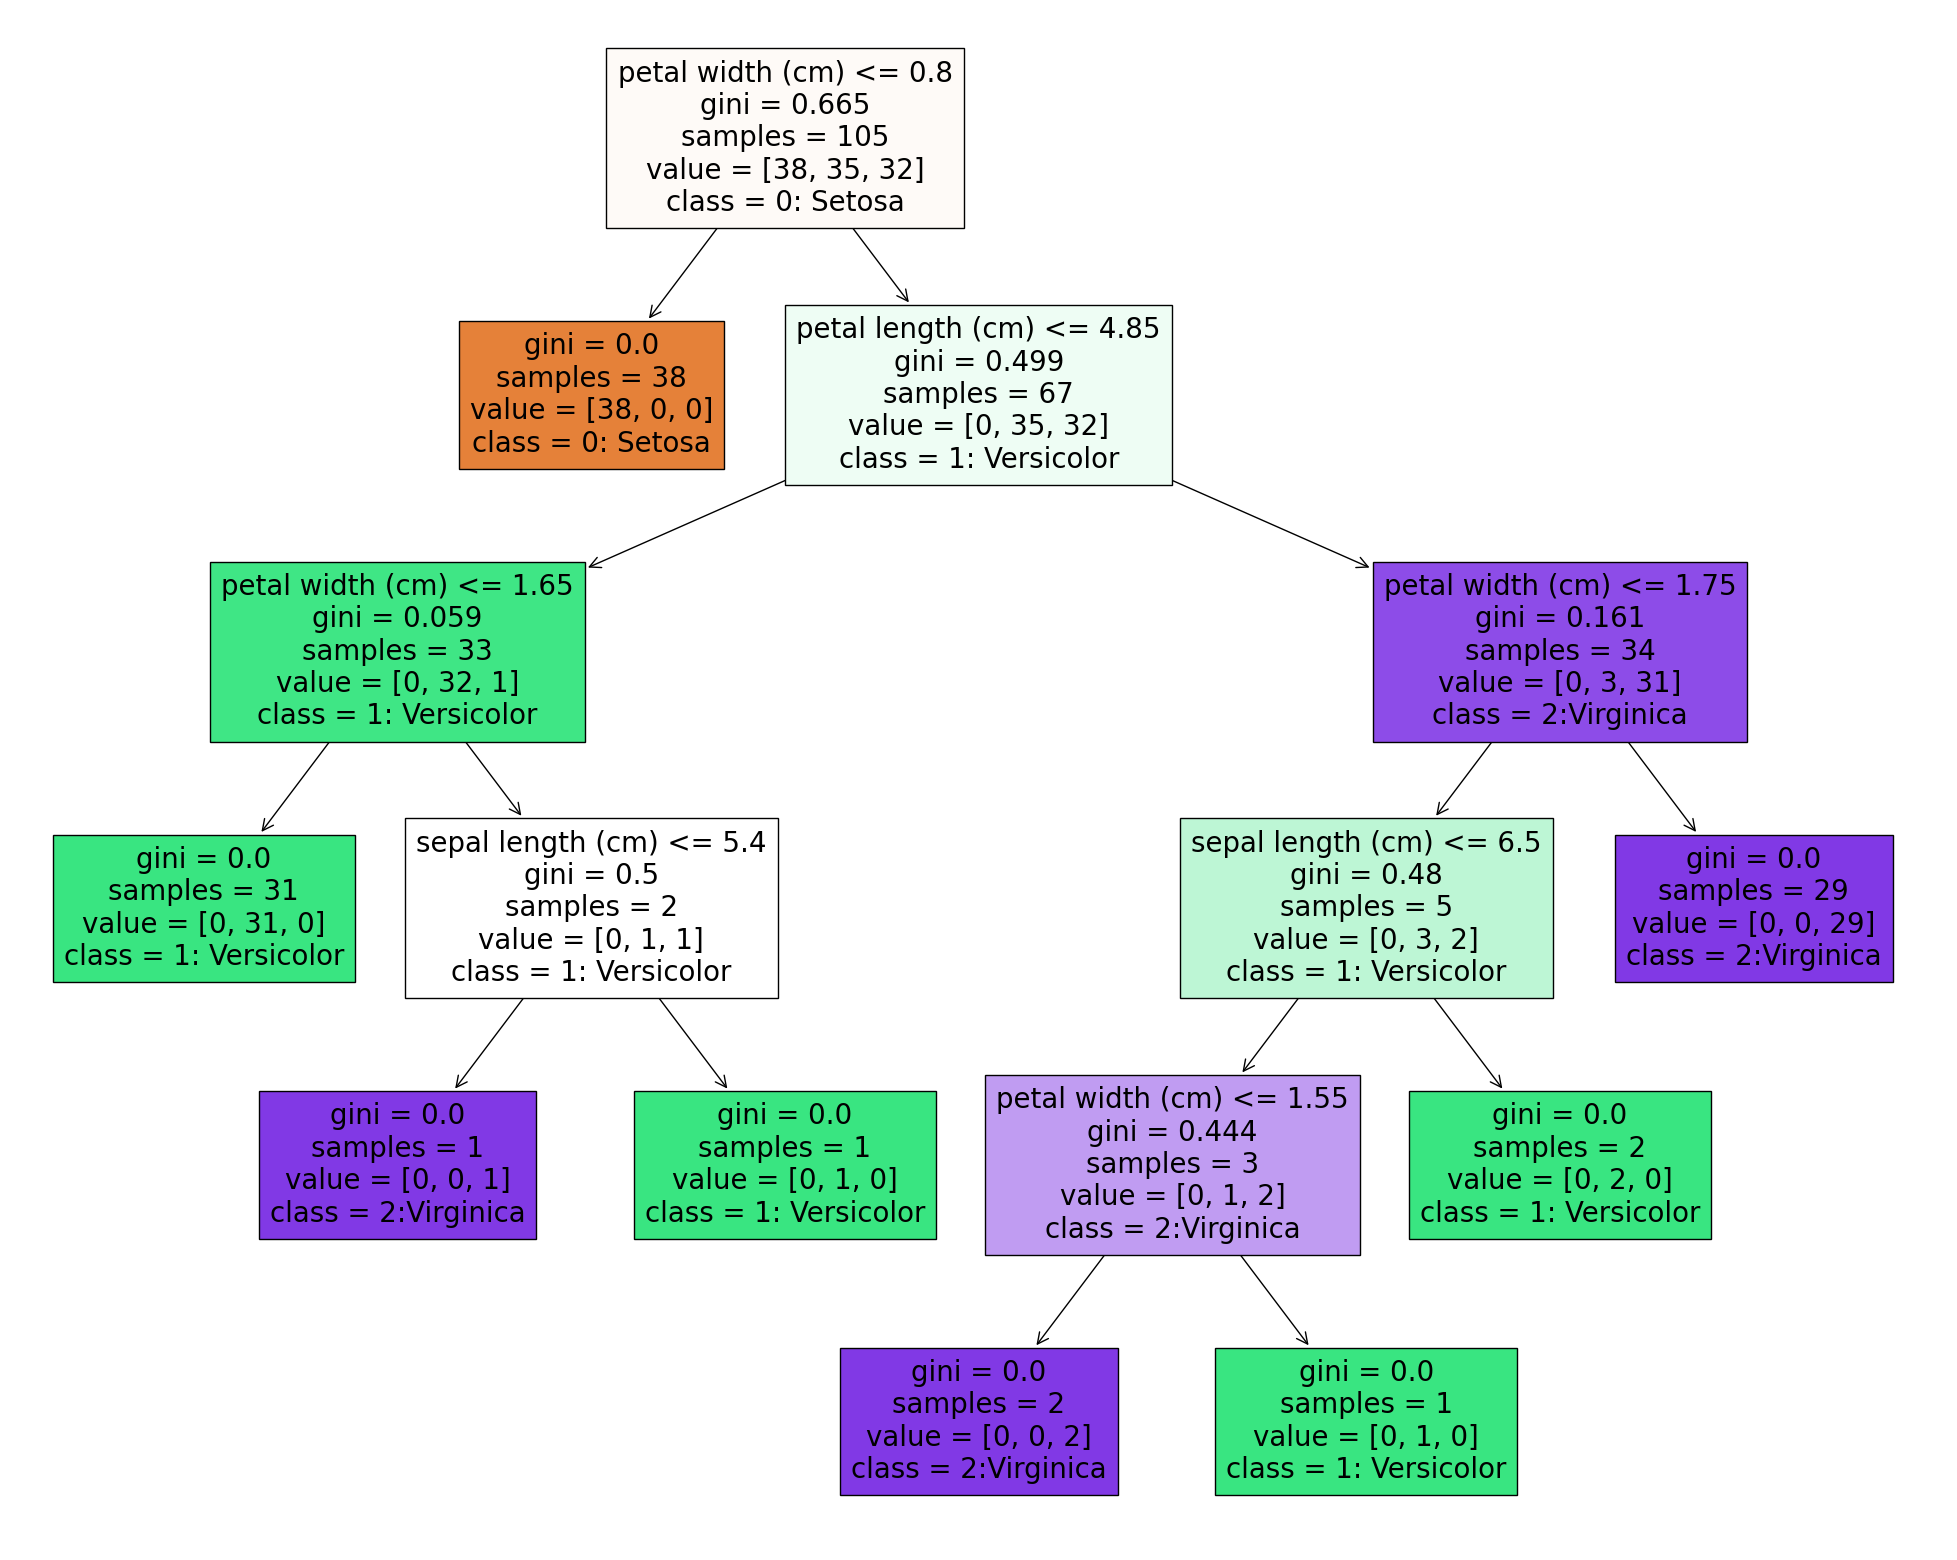

In [17]:
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))

#Hiển thị cây quyết định
tree.plot_tree(Tree_iris, 
                   feature_names=feature_names,  
                   class_names=target_names,
                   filled=True)
plt.show()

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0.02959629 0.         0.37266771 0.597736  ]


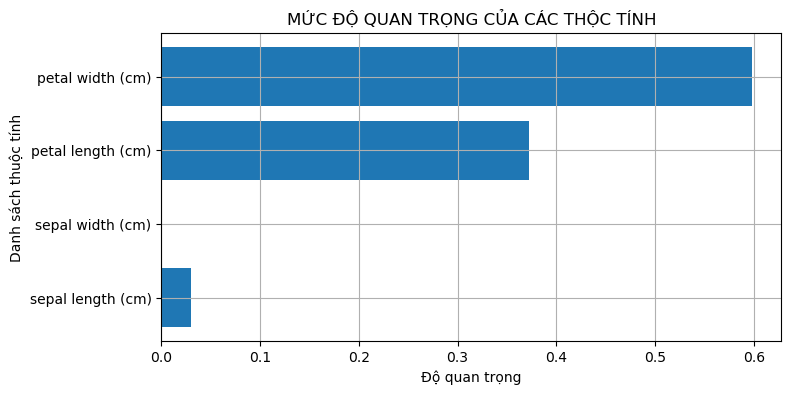

In [18]:
#Xác định mực độ quan trọng của các thuộc tính độc lập:
print(feature_names)
print(Tree_iris.feature_importances_)

#Trực quan hóa
plt.figure(figsize=(8,4))
plt.barh(feature_names,Tree_iris.feature_importances_)

plt.title('MỨC ĐỘ QUAN TRỌNG CỦA CÁC THỘC TÍNH')
plt.ylabel('Danh sách thuộc tính')
plt.xlabel('Độ quan trọng')
plt.grid(True)
plt.show()

In [19]:
#Xác định độ sâu của cây: Khoảng cách tối đa giữa gốc và lá
print('Độ sâu của cây quyết định:',
      Tree_iris.get_depth())

#Xác định số lượng nút lá của cây quyết định:
print('Số nút lá của cây quyết định:',
      Tree_iris.get_n_leaves())

Độ sâu của cây quyết định: 5
Số nút lá của cây quyết định: 8


**Nhận xét**


## 2.4. Đánh giá model trên tập kiểm thử:
---
Sử dụng model dự đoán trên tập Test và đánh giá độ chính xác

In [20]:
#Tập test gồm 45 mẫu:
X_test

array([[5.8, 2.7, 5.1, 1.9],
       [6. , 2.9, 4.5, 1.5],
       [5. , 3.3, 1.4, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [6.3, 2.9, 5.6, 1.8],
       [7. , 3.2, 4.7, 1.4],
       [6.1, 2.8, 4. , 1.3],
       [5.2, 3.4, 1.4, 0.2],
       [5.6, 3. , 4.1, 1.3],
       [5.7, 2.8, 4.5, 1.3],
       [5.5, 2.4, 3.8, 1.1],
       [5.4, 3.4, 1.5, 0.4],
       [6.3, 3.3, 4.7, 1.6],
       [6. , 2.2, 4. , 1. ],
       [4.8, 3.4, 1.9, 0.2],
       [6.8, 2.8, 4.8, 1.4],
       [6.1, 2.6, 5.6, 1.4],
       [5.7, 2.5, 5. , 2. ],
       [7.2, 3. , 5.8, 1.6],
       [6.7, 3.1, 4.7, 1.5],
       [5.9, 3. , 5.1, 1.8],
       [6. , 3. , 4.8, 1.8],
       [6.3, 3.4, 5.6, 2.4],
       [4.6, 3.1, 1.5, 0.2],
       [5.3, 3.7, 1.5, 0.2],
       [6.5, 3. , 5.2, 2. ],
       [5.6, 2.5, 3.9, 1.1],
       [6.3, 3.3, 6. , 2.5],
       [7.1, 3. , 5.9, 2.1],
       [6.3, 2.5, 4.9, 1.5],
       [6.7, 3.3, 5.7, 2.5],
       [4.6, 3.6, 1. , 0.2],
       [5.7, 2.6, 3.5, 1. ],
       [4.9, 3.1, 1.5, 0.1],
       [6.2, 2

In [21]:
#Phân loại hoa lan trên tập kiểm thử
y_pred = Tree_iris.predict(X_test)

print("Kết quả phân loại hoa lan trên tập dữ liệu TEST:")
print("Predicted labels: ", y_pred)
print("Ground truth    : ", y_test)

Kết quả phân loại hoa lan trên tập dữ liệu TEST:
Predicted labels:  [2 1 0 0 2 1 1 0 1 1 1 0 1 1 0 1 2 2 1 1 2 1 2 0 0 2 1 2 2 2 2 0 1 0 1 2 1
 2 2 0 1 0 2 2 0]
Ground truth    :  [2 1 0 0 2 1 1 0 1 1 1 0 1 1 0 1 2 2 2 1 2 2 2 0 0 2 1 2 2 1 2 0 1 0 2 2 1
 2 2 0 1 0 2 2 0]


In [22]:
#Đánh giá độ chính xác trên tập Test:
from sklearn.metrics import accuracy_score
acc_num = accuracy_score(y_test, y_pred, normalize=False)
acc = accuracy_score(y_test, y_pred, normalize=True)

print("1.Tổng số mẫu dự đoán đúng:",acc_num, '/', len(y_test))
print("2.Độ chính xác đạt của model trên tập Test:", round(acc*100,2))

1.Tổng số mẫu dự đoán đúng: 41 / 45
2.Độ chính xác đạt của model trên tập Test: 91.11


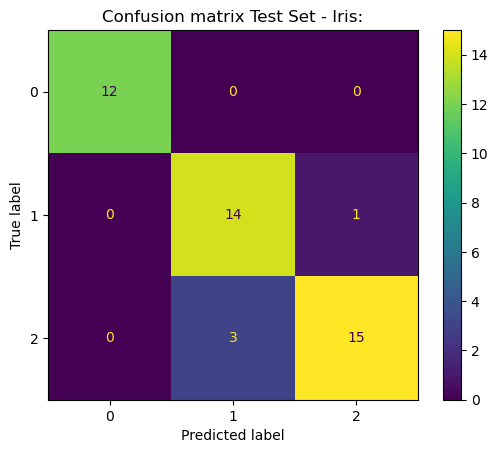

In [23]:
#3.Sử dụng ma trận confussion matrix kiểm tra kết quả:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cnf_matrix_titanic = confusion_matrix(y_test,y_pred)

#Hiển thị ma trận:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion matrix Test Set - Iris:')
plt.show()

## 2.4. Sử dụng model được huấn luyện dự đoán cho bộ dữ liệu mới
---
<img src='pic/iris1.png' width='180px'>
Giả sử một bông hoa lan có thông số như sau:

    - sepal length (cm): 5.2
    - sepal width (cm) : 3.1
    - petal length (cm): 3.9
    - petal width (cm) : 1.2

--> Bông hoa lan này thuộc lớp nào?

In [24]:
#Khai báo thông số hoa lan mới:
iris_new = np.array([[5.2, 3.1, 3.9, 1.2]])
print('Mấu thông số hoa: ',iris_new)


Mấu thông số hoa:  [[5.2 3.1 3.9 1.2]]


In [25]:
#Xác định lớp của hoa dựa vào các thông số này trên model đã huấn luyện
y_new = Tree_iris.predict(iris_new)
print('Thông số hoa lan: ', iris_new)
print('ML dự đoán: ')
if(y_new==0):
    print(target_names[0])
elif (y_new == 1):
    print(target_names[1])
else:
    print(target_names[2])
    
    
    
    



Thông số hoa lan:  [[5.2 3.1 3.9 1.2]]
ML dự đoán: 
1: Versicolor


## 2.6. Thay đổi tham số của mô hình
---
**Tham số mặc định:**
 * 'ccp_alpha': 0.0,
 * 'class_weight': None,
 * 'criterion': 'gini',
 * 'max_depth': None,
 * 'max_features': None,
 * 'max_leaf_nodes': None,
 * 'min_impurity_decrease': 0.0,
 * 'min_impurity_split': None,
 * 'min_samples_leaf': 1,
 * 'min_samples_split': 2,
 * 'min_weight_fraction_leaf': 0.0,
 * 'random_state': None,
 * 'splitter': 'best'

In [26]:
#Khai báo mô hình mới:
Tree_iris1  = DecisionTreeClassifier(criterion= 'entropy', 
                                     splitter='random', 
                                     max_features = 3,
                                     random_state=1)

Tree_iris1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 3,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'random'}

In [27]:
# Huấn luyên mô hình mới với dữ liệu huấn luyện
Tree_iris1.fit(X_train, y_train)

print("Độ chính xác của tập huấn luyện:",round(Tree_iris1.score(X_train, y_train)*100,2))

Độ chính xác của tập huấn luyện: 100.0


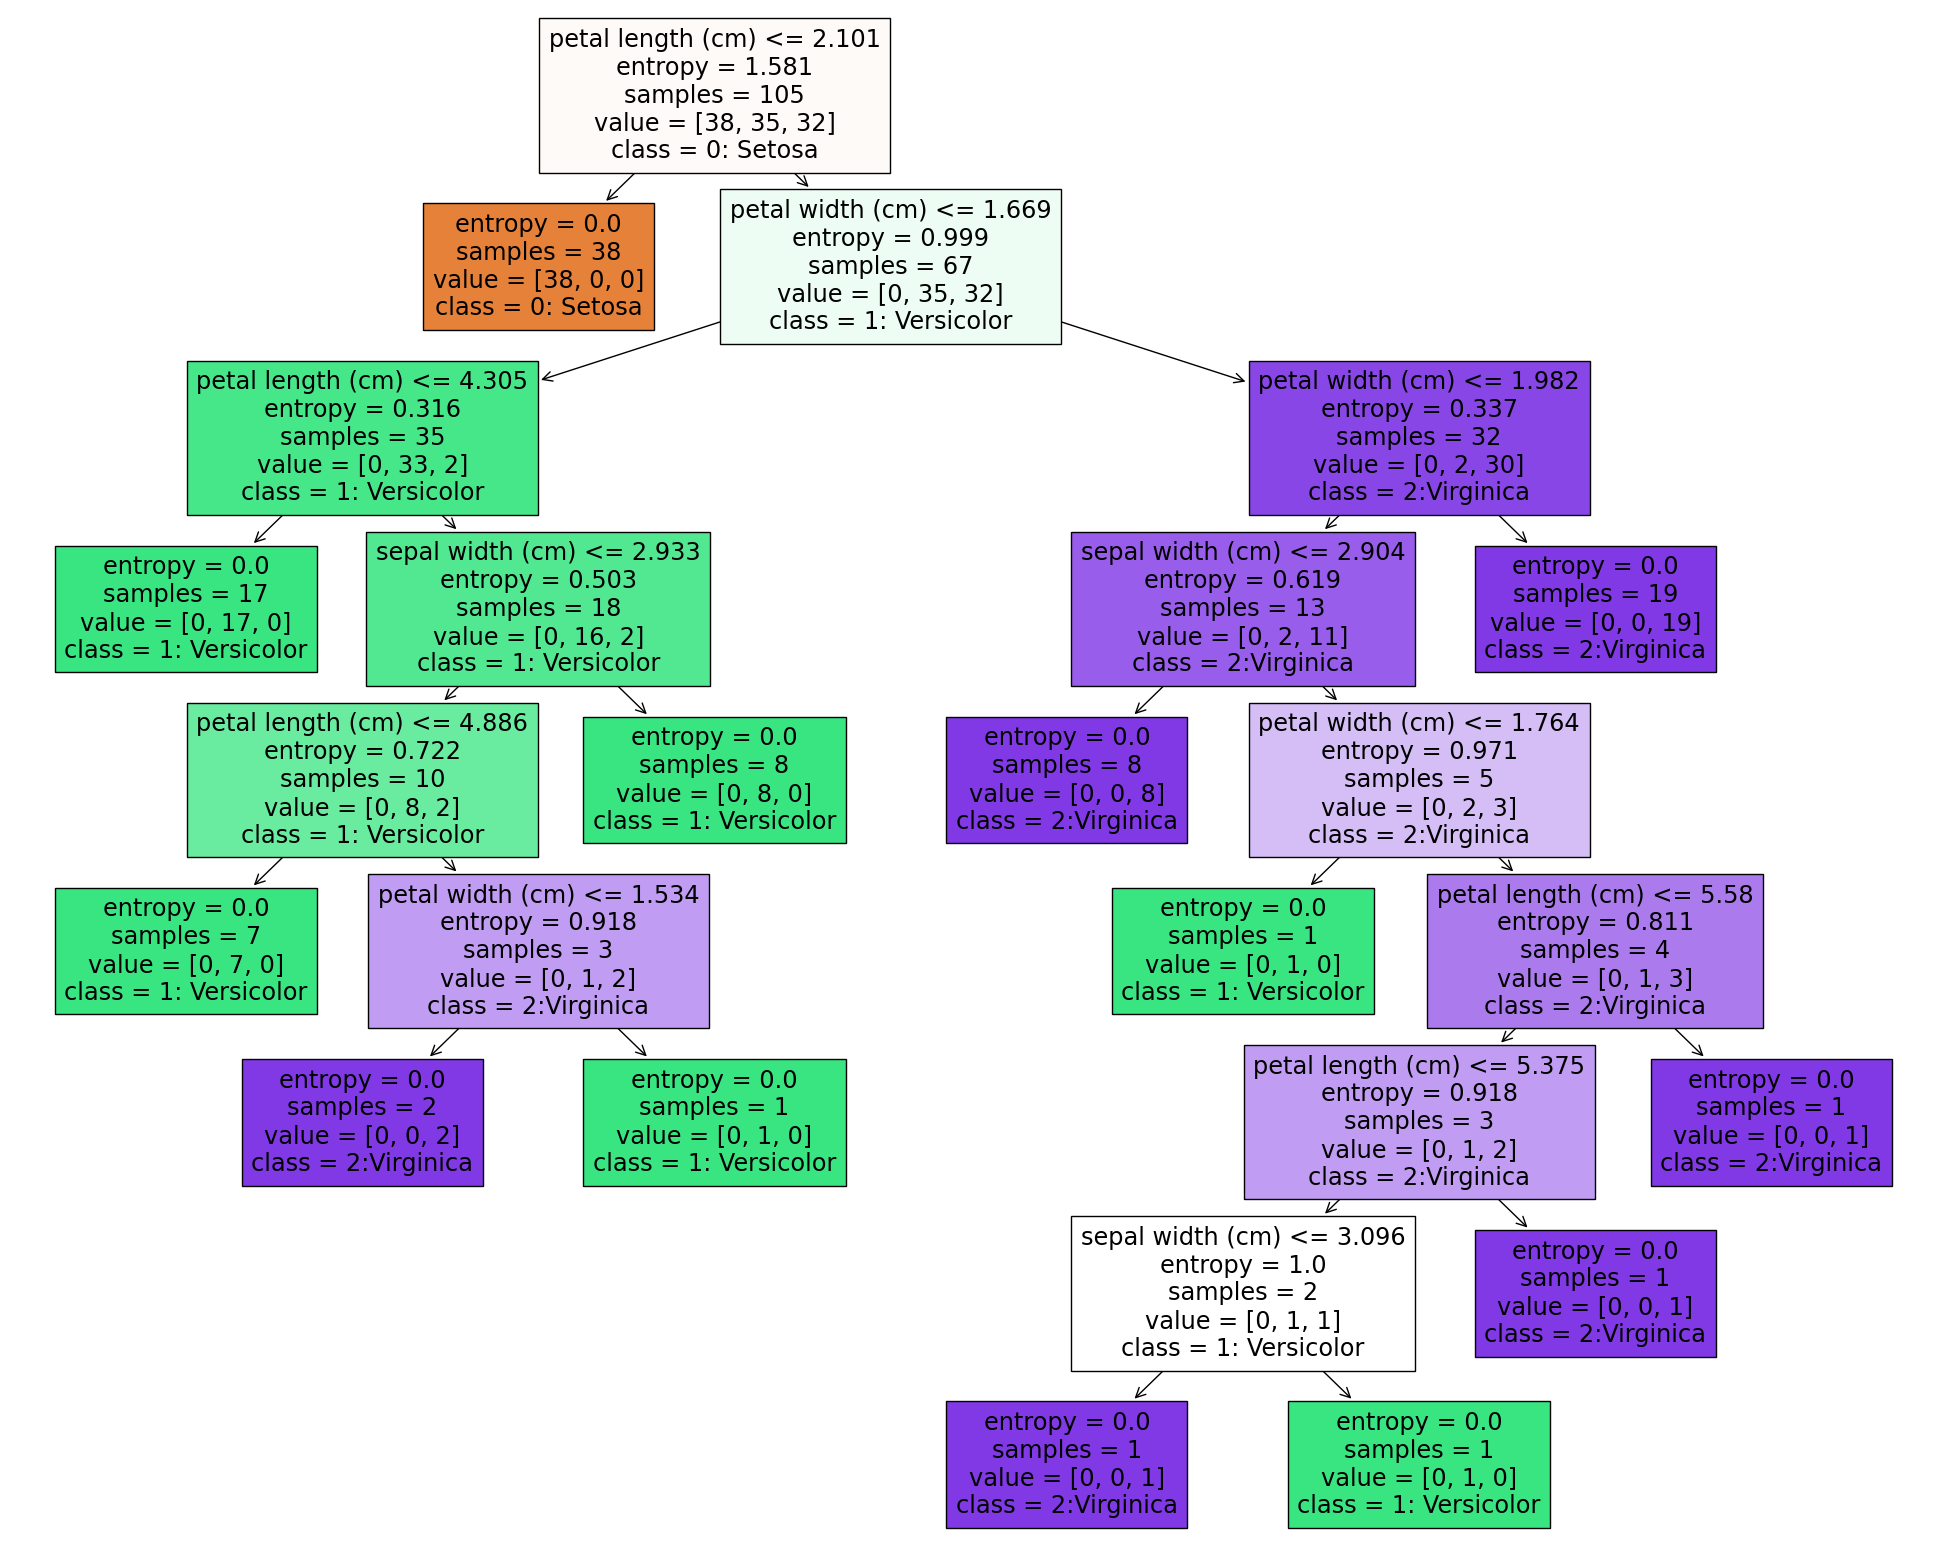

In [28]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))

#Hiển thị cây quyết định:
tree.plot_tree(Tree_iris1, 
                   feature_names=feature_names,  
                   class_names=target_names,
                   filled=True)
plt.show()

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0.         0.04237639 0.64352636 0.31409724]


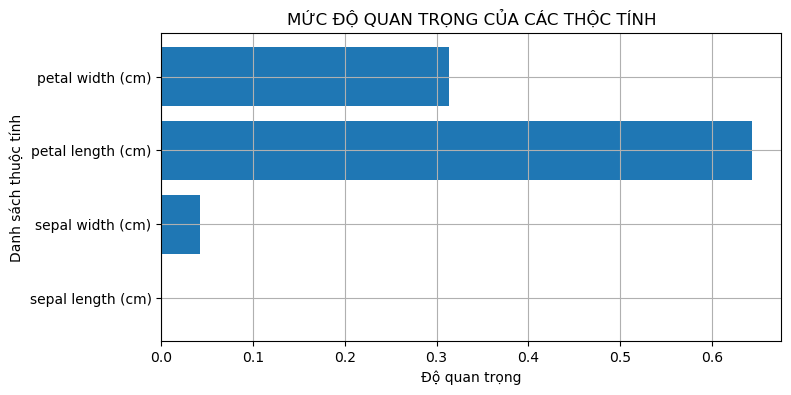

In [29]:
#Xác định mực độ quan trọng của các thuộc tính độc lập:
print(feature_names)
print(Tree_iris1.feature_importances_)

#Trực quan hóa độ quan trọng của các thuộc tính
plt.figure(figsize=(8,4))
plt.barh(feature_names,Tree_iris1.feature_importances_)

plt.title('MỨC ĐỘ QUAN TRỌNG CỦA CÁC THỘC TÍNH')
plt.ylabel('Danh sách thuộc tính')
plt.xlabel('Độ quan trọng')
plt.grid(True)
plt.show()

In [30]:
#Xác định độ sâu của cây: Khoảng cách tối đa giữa gốc và lá
print('Độ sâu của cây quyết định:',
      Tree_iris1.get_depth())

#Xác định số lượng nút lá của cây quyết định:
print('Số nút lá của cây quyết định:',
      Tree_iris1.get_n_leaves())

Độ sâu của cây quyết định: 8
Số nút lá của cây quyết định: 13


In [31]:
#Phân loại hoa lan trên tập kiểm thử
y_pred1 = Tree_iris1.predict(X_test)

print("Kết quả phân loại hoa lan trên tập dữ liệu TEST:")
print("Predicted labels: ", y_pred1)
print("Ground truth    : ", y_test)

Kết quả phân loại hoa lan trên tập dữ liệu TEST:
Predicted labels:  [2 1 0 0 2 1 1 0 1 1 1 0 1 1 0 1 2 2 1 1 2 2 2 0 0 2 1 2 2 2 2 0 1 0 2 2 1
 2 2 0 1 0 2 2 0]
Ground truth    :  [2 1 0 0 2 1 1 0 1 1 1 0 1 1 0 1 2 2 2 1 2 2 2 0 0 2 1 2 2 1 2 0 1 0 2 2 1
 2 2 0 1 0 2 2 0]


In [32]:
#Đánh giá độ chính xác:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_test, y_pred1, normalize=True)
acc1_num = accuracy_score(y_test, y_pred1, normalize=False)
print("Độ chính xác của mô hình trên tập TEST:", round(acc1*100,2), '%')
print("Tổng số mẫu dự đoán đúng:",acc1_num, '/', len(y_test))

Độ chính xác của mô hình trên tập TEST: 95.56 %
Tổng số mẫu dự đoán đúng: 43 / 45


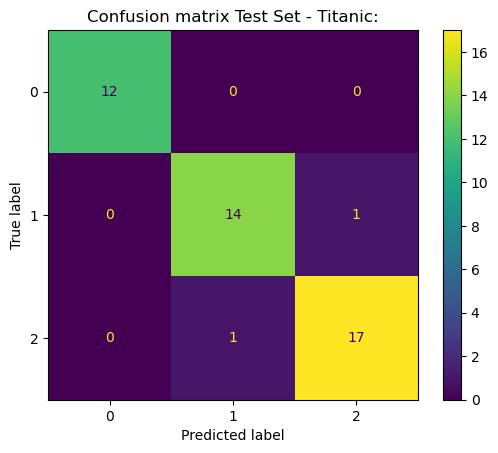

In [33]:
#3.Sử dụng ma trận confussion matrix kiểm tra kết quả:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cnf_matrix_titanic = confusion_matrix(y_test,y_pred1)

#Hiển thị ma trận:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred1)
plt.title('Confusion matrix Test Set - Titanic:')
plt.show()

## B. THỰC HÀNH TRÊN LỚP
---

Thực hiện thuật toán Cây quyết định trên tập dữ liệu Titanic:
<img src='pic/titanic.jpg' width='500px'>

**Mô tả các thuộc tính:**

* 1.Survived: 0: Không được cứu - 1: Được cứu
* 2.Pclass: Hạng vé( 1 - hạng nhất, 2 - hạng 2, 3 - hạng 3)
* 3.Sex: Giới tính (0 - Male, 1 - Nữ)
* 4.Age: Độ tuổi
        * 0: Tuổi từ 0 - 16 tuổi
        * 1: Tuổi từ 17 - 32 tuổi
        * 2: Tuổi từ 32 - 48 tuổi
        * 3: Tuổi từ 48 - 64 tuổi
        * 4: Tuổi từ 64 tuổi trở lên
* 5.SibSp: Số lượng anh chị em đi cùng
* 6.Parch: Số lượng con cái, ba mẹ đi cùng
* 7.Emberked: Cảng lên tàu (0: Cảng S, 1: Cảng C, 2: Cảng Q
    

In [34]:
#Đọc dữ liệu:
df_titanic = pd.read_csv('Data/Data_Titanic_OK.csv')
df_titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,1,1,0,0
1,1,1,1,2,1,0,1
2,1,3,1,1,0,0,0
3,1,1,1,2,1,0,0
4,0,3,0,2,0,0,0
...,...,...,...,...,...,...,...
1304,0,3,0,1,0,0,0
1305,1,1,1,2,0,0,1
1306,0,3,0,2,0,0,0
1307,0,3,0,1,0,0,0


In [35]:
#hiển thị 5 dòng dữ liệu:
df_titanic.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,1,1,0,0
1,1,1,1,2,1,0,1
2,1,3,1,1,0,0,0
3,1,1,1,2,1,0,0
4,0,3,0,2,0,0,0


In [36]:
#Tách biến độc lập và biến phụ thuộc:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                   y,
                                                   test_size=0.25,
                                                   shuffle=True) # lấy ngẫu nhiên
print('Số mẫu trong dữ liệu gốc ban đầu :', len(y))
print('Số mẫu troing dữ liệu train (75%): ', len(y_train))
print('Số mấu treong dữ liệu test (25%): ',len(y_test))

Số mẫu trong dữ liệu gốc ban đầu : 150
Số mẫu troing dữ liệu train (75%):  112
Số mấu treong dữ liệu test (25%):  38


In [37]:
#Tách dữ liệu thành 2 phần Train - Test: 75 - 25


In [38]:
#Khai báo model phân lớp sử dụng cây quyết định:
#Gọi thư viên thuật toán DecisionTree
from sklearn.tree import DecisionTreeClassifier
# Khgai báo mô hình : sử dụng các tham số mặc định của mô hình
Tree_titanic = DecisionTreeClassifier() 

#Danh sách các tham số của mô hình
Tree_titanic.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [39]:
#Huấn luyện mô hình:
Tree_titanic.fit(X_train, y_train)


DecisionTreeClassifier()

In [40]:
#Đánh giá độ chính xác trên tập huấn luyện:
acc_train = Tree_titanic.score(X_train, y_train)
print('Độ chính xác của mô hình huấn luyện: ', round(acc_train*100,2))

Độ chính xác của mô hình huấn luyện:  100.0


In [41]:
#Phân loại hoa lan trên tập kiểm thử
y_pred = Tree_titanic.predict(X_test)

print("Kết quả phân loại hoa lan trên tập dữ liệu TEST:")
print("Predicted labels: ", y_pred)
print("Ground truth    : ", y_test)

Kết quả phân loại hoa lan trên tập dữ liệu TEST:
Predicted labels:  [1 2 1 1 2 2 2 1 0 0 2 2 0 2 1 2 1 1 2 0 0 1 2 2 0 1 1 0 2 2 0 2 1 0 0 0 1
 0]
Ground truth    :  [1 2 1 1 2 2 2 1 0 0 2 2 0 2 1 2 1 1 2 0 0 1 2 2 0 1 1 0 2 2 0 2 1 0 0 0 1
 0]


In [42]:
#Đánh giá độ chính xác trên tập Kiểm tra:
from sklearn.metrics import accuracy_score
acc_num = accuracy_score(y_test, y_pred, normalize=False)
acc = accuracy_score(y_test, y_pred, normalize=True)

print("1.Tổng số mẫu dự đoán đúng:",acc_num, '/', len(y_test))
print("2.Độ chính xác đạt của model trên tập Test:", round(acc*100,2))

1.Tổng số mẫu dự đoán đúng: 38 / 38
2.Độ chính xác đạt của model trên tập Test: 100.0


In [43]:
#Đặt tên cho các thuộc tính 

feature_names = ['Pclass','Sex','Age','SibSp','Parch','Emberked']
target_names = ['Survived']

IndexError: list index out of range

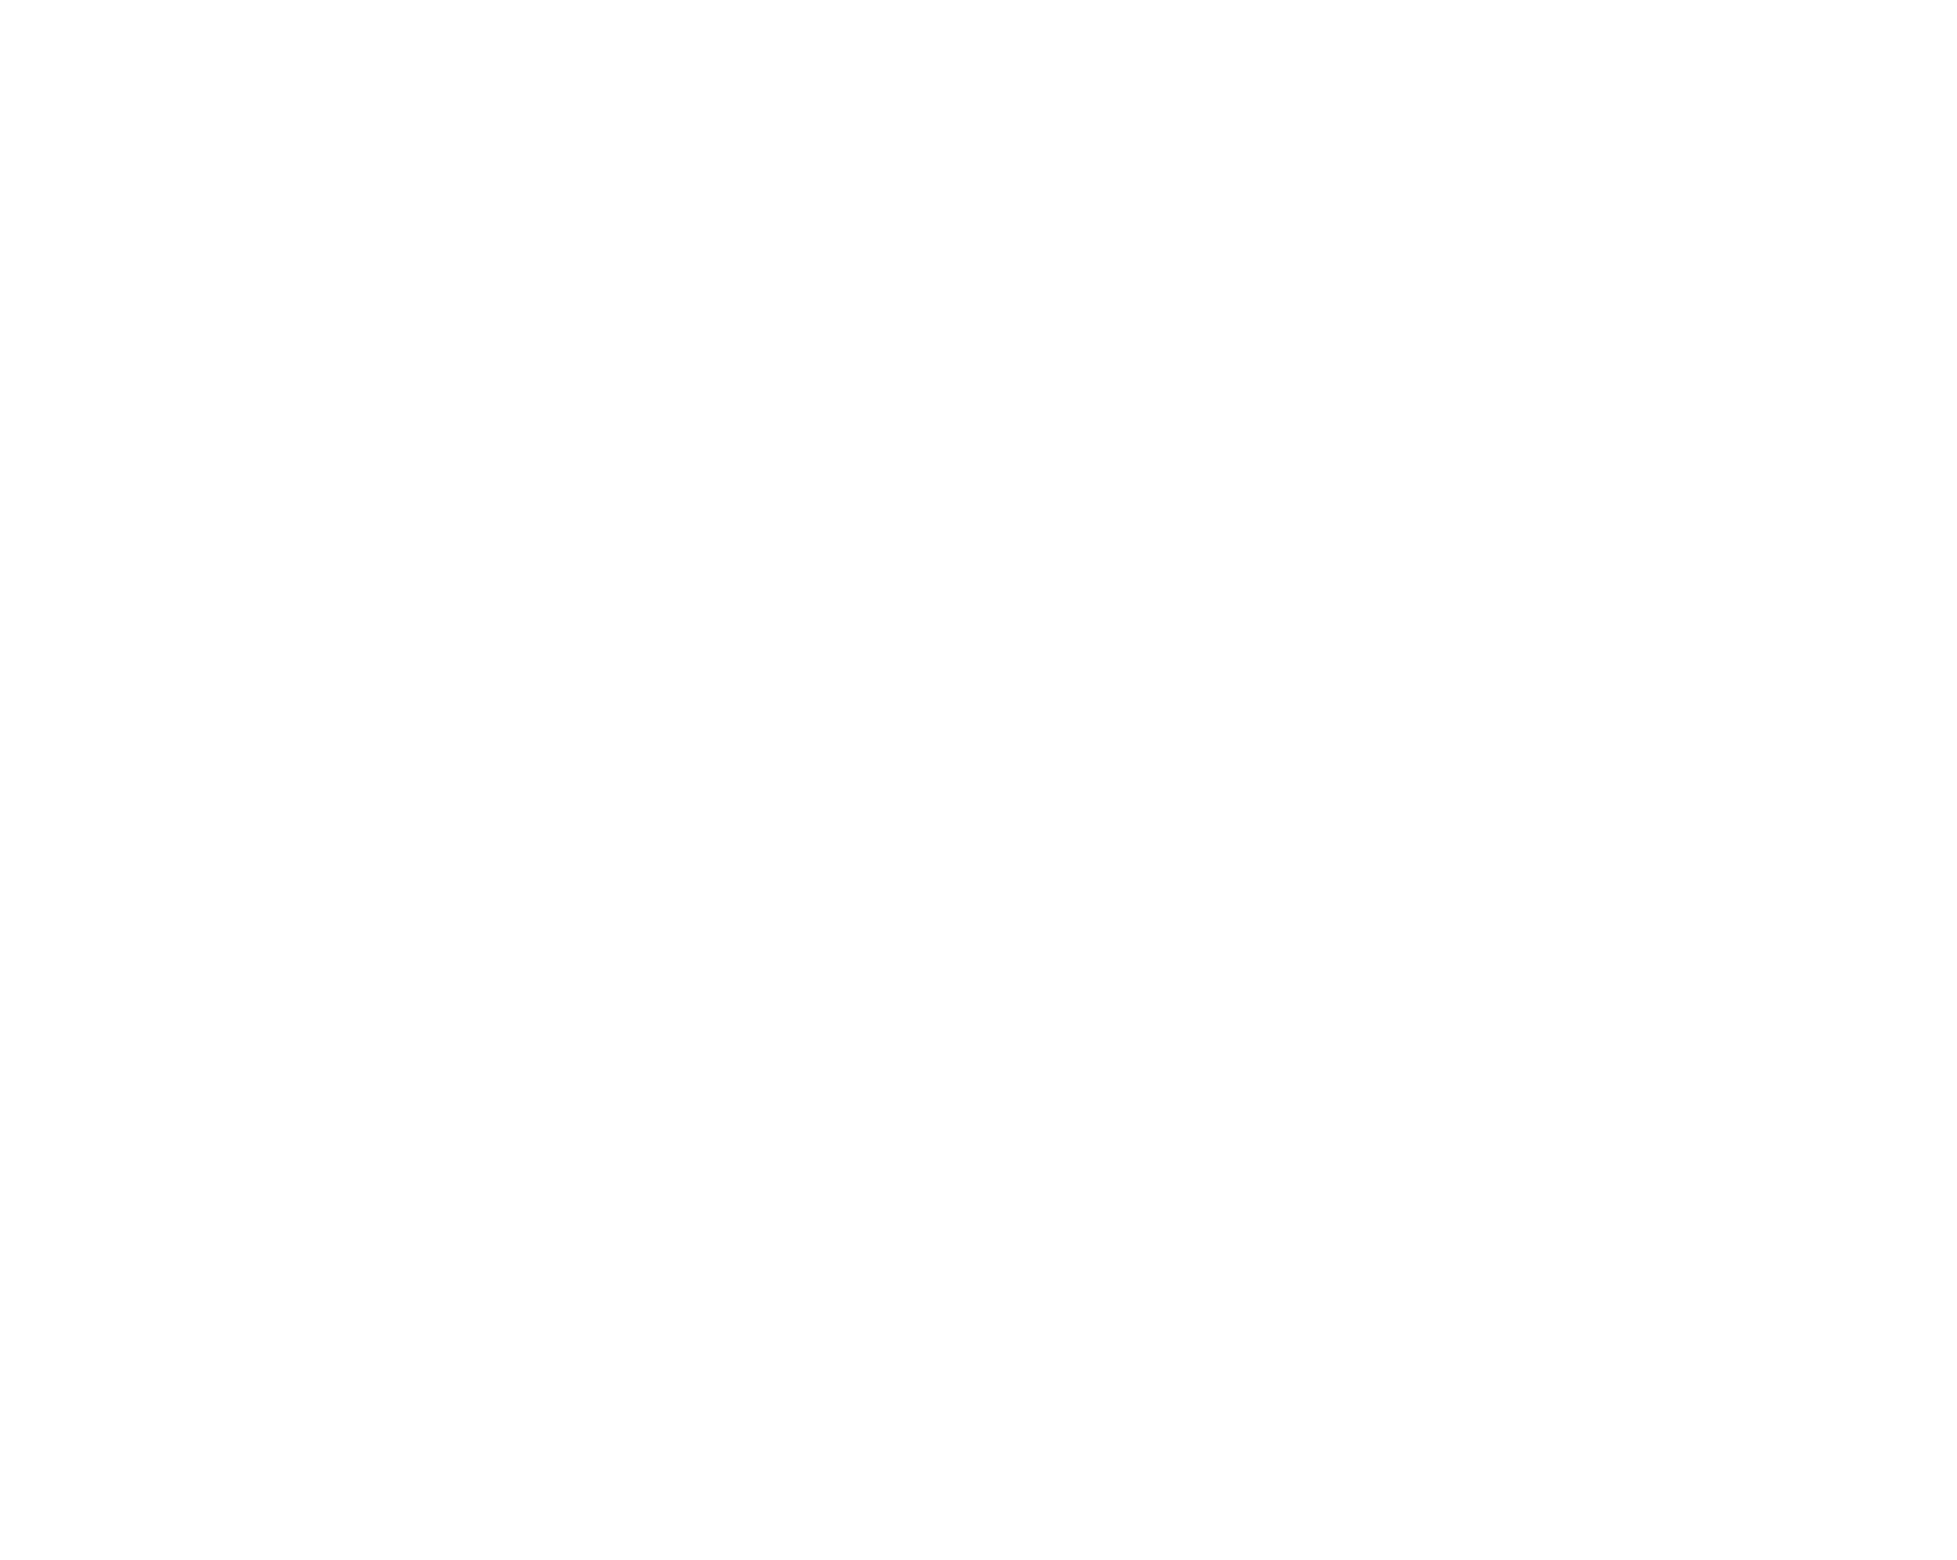

In [44]:
#Hiển thị cây quyết định
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))

#Hiển thị cây quyết định
tree.plot_tree(Tree_titanic, 
                   feature_names=feature_names,  
                   class_names=target_names,
                   filled=True)
plt.show()

In [ ]:
#Xác định mức độ quan trọng của từng thuộc tính:



## Sử dụng mô hình để dự đoán với dữ liệu mới:

### Trường hợp 1:
---
Cho biết Hành khách số 1 là một cô gái, 22 tuổi, mua vé hạng 3, đi tàu một mình, lên tàu ở cảng Q ---> Cho biết hành khách này Được cứu hay không được cứu?

### Trường hợp 2:
---
Cho biết Hành khách số 2 là một người đàn ông trung niên, 40 tuổi, mua vé hạng 1, đi tàu với vợ, lên tàu ở cảng S ---> Cho biết hành khách này Được cứu hay không được cứu?


## C. BÀI TẬP:
---
Xây dựng mô hình học máy với thuật toán Cây quyết định (Decision Tree) dự đoán một bệnh nhân u vú là lành tính hay ác tính. Sinh viên sử dụng tập 961 bệnh nhân u vú đã xử lý ở Chương 2; 

1. Đọc tập dữ liệu đã chuẩn hóa ở chương 2

2. Phân tách các biến Độc lập (X) - Phụ thuộc (Y) tương ứng

3. Chia tập dữ liệu thành 2 phần Train - Test với tỷ lệ 70% - 30%

4. Xây dựng model dự đoán bệnh nhân bị bệnh u vú lành tính - ác tính với thuật toán cây quyết định (Decision Tree), Sử dụng model với các tham số mặc định để huấn luyện và kiểm thử trên Train – Test.

**Hiển thị các kết quả sau của model:**

    a)Xác định và trực quan hóa độ quan trọng của các thuộc tính độc lập trong tập huấn luyện
    b)Hiển thị cây quyết định trên tập Huấn luyện.
    c)Độ chính xác của model (accuracy) trên tập Train – Test
    d)Tổng số mẫu dự đoán đúng - sai trên tập Test 
    e)Ma trận confusion matrix trên tập Test


5. Dự đoán với mô hình xây dựng được
- Bệnh nhân 1 có các thông số như sau:

    * Age:  40 tuổi;
    * Weight: 60 Kg
    * Shape: Round;
    * Margin: Obscured!
    * Density: Low

- Bệnh nhân 2 có các thông số như sau:  
    * Age:  64 tuổi;
    * Weight: 70 kg
    * Shape: Round;
    * Margin: Circumscribed
    * Density: Iso

Sử dụng model ở trên dự đoán xem bệnh nhân 1, 2  này bị u lành tính  hay ác tính;

NOTE: Sinh viên làm tiếp vào file bài tập chương 2, sau đó đặt lại tên: **Manhom_MaSV_Hoten_Baitap_DecisionTree** và nộp bài theo link bài nộp:
https://docs.google.com/forms/d/e/1FAIpQLSdU-u9a3Hf5dRcZJv1T6sk0cVLqnKTUEha1dgNxNsjjSPyYGA/viewform
